# WTA Best tournament for players

## Introduction

In the last years WTA (Women Tennis Asiciation) has many changes for the number 1 Tennis player, there are a great number of tournaments, sourfaces and characteristics that may lead to a player to win or lose.

This would be an analysis that will try to look for a common patron, and would suget a player which tournament would be better to play in order to win.


## Data

Fortunately, Jeff Sackmann has been doing an amazing job gathering information for all tennis player and tournaments, below is the link to his page:

https://github.com/JeffSackmann/tennis_wta

To load data for current proyect, data from different years was joined (2015 to 2019) this way data from several years can be evaluated.

## Data selection

Within data on files provided, there are many different parameters, the main goal will be to try to identify if court surface, country and if player is right, left handed will influence on a match result.



In [1]:
# Install all libraries to be used on project
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    ca-certificates-2019.11.27 |                0         132 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    seaborn-0.9.0              |     pyh91ea838_1         164 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0       --> 2019.11.27-0       anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_0  anaconda
    openssl:         1.1.1d-h7b6447c_3  --> 1.1.1-h7b6447c_0   anaconda
    seaborn:         0.9.0-py

In [27]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fd2bda2266444876853bd0f238a82ae6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='39vtZxvjGZdYivUdp-nP4WAV3VdZ447NGWSNqGtgKCnJ',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_fd2bda2266444876853bd0f238a82ae6.get_object(Bucket='wtadifferentcharacteristicsevalua-donotdelete-pr-idizahhtbm6zp2',Key='WTA2015-2019_v1_utf8_clean.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_ioc,winner_age,winner_rank,loser_id,loser_name,loser_hand,loser_ioc,loser_age,loser_rank
0,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,201667,Ling Zhang,R,HKG,25.169062,206,203557,Mana Ayukawa,R,JPN,20.290212,473
1,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,206154,Varunya Wongteanchai,U,THA,21.973990,790,204345,Polina Merenkova,U,UZB,19.132101,849
2,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,204288,Ji Hee Choi,R,KOR,19.882272,495,201598,Noppawan Lertcheewakarn,R,THA,23.112936,330
3,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,204291,Na Lae Han,U,KOR,22.480493,313,202638,Chiaki Okadaue,U,JPN,28.167009,421
4,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,214278,Mizuno Kijima,U,JPN,19.104723,692,212026,Kwan Yau Ng,U,HKG,17.856263,1000


In [28]:
df_wta = df_data_0
df_wta.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_ioc,winner_age,winner_rank,loser_id,loser_name,loser_hand,loser_ioc,loser_age,loser_rank
0,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,201667,Ling Zhang,R,HKG,25.169062,206,203557,Mana Ayukawa,R,JPN,20.290212,473
1,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,206154,Varunya Wongteanchai,U,THA,21.973990,790,204345,Polina Merenkova,U,UZB,19.132101,849
2,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,204288,Ji Hee Choi,R,KOR,19.882272,495,201598,Noppawan Lertcheewakarn,R,THA,23.112936,330
3,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,204291,Na Lae Han,U,KOR,22.480493,313,202638,Chiaki Okadaue,U,JPN,28.167009,421
4,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,214278,Mizuno Kijima,U,JPN,19.104723,692,212026,Kwan Yau Ng,U,HKG,17.856263,1000


In [29]:
df_wta.describe()

,draw_size,tourney_date,winner_id,winner_age,winner_rank,loser_id,loser_age,loser_rank
count,72083.000000,7.208300e+04,72083.000000,72083.000000,72083.000000,72083.000000,72083.000000,72083.000000
mean,35.359044,2.016747e+07,208276.811079,22.614551,495.524409,209748.659753,22.017532,640.533108
std,16.883138,1.264466e+04,5324.382660,3.684749,293.047831,5731.630551,3.985508,340.648417
min,10.000000,2.014123e+07,200002.000000,14.806297,24.000000,200002.000000,14.004107,19.000000
25%,32.000000,2.016022e+07,202706.000000,19.789185,253.000000,203533.000000,19.025325,324.000000
50%,32.000000,2.017031e+07,206357.000000,22.094456,450.000000,211316.000000,21.445585,631.000000
75%,32.000000,2.018040e+07,213706.000000,24.930869,684.000000,214517.000000,24.438056,1000.000000
max,128.000000,2.019112e+07,221911.000000,39.967146,1295.000000,222889.000000,69.678303,1295.000000


### Removed Columns from original  data, also won't take into consideration players age over 40 or age is not posted in file, no hand if posted, and so on, no data on main columns used for analysis.


In [31]:
df_wta.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_ioc,winner_age,winner_rank,loser_id,loser_name,loser_hand,loser_ioc,loser_age,loser_rank
0,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,201667,Ling Zhang,R,HKG,25.169062,206,203557,Mana Ayukawa,R,JPN,20.290212,473
1,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,206154,Varunya Wongteanchai,U,THA,21.973990,790,204345,Polina Merenkova,U,UZB,19.132101,849
2,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,204288,Ji Hee Choi,R,KOR,19.882272,495,201598,Noppawan Lertcheewakarn,R,THA,23.112936,330
3,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,204291,Na Lae Han,U,KOR,22.480493,313,202638,Chiaki Okadaue,U,JPN,28.167009,421
4,2015-W-C10-HKG-01A-2015,Hong Kong $10K,Hard,32,10,20141229,214278,Mizuno Kijima,U,JPN,19.104723,692,212026,Kwan Yau Ng,U,HKG,17.856263,1000


### First let's take a look to the different values for columns that will be used

#### Surface of the court        

In [32]:
df_wta['surface'].value_counts()

Hard      34585
Clay      33520
Carpet     2140
Grass      1838
Name: surface, dtype: int64

#### Country of origin of winning player

In [33]:

df_wta['winner_ioc'].value_counts()

RUS    5774
USA    5450
ITA    3730
FRA    3689
JPN    3315
ROU    3149
CHN    2963
GER    2806
CZE    2568
ESP    2359
UKR    2155
GBR    1825
BEL    1786
AUS    1773
SUI    1671
SVK    1513
NED    1288
SRB    1249
CRO    1180
BUL    1173
IND    1121
HUN    1075
ARG    1027
SLO    1010
BRA     904
POL     860
SWE     845
TUR     819
BLR     796
KOR     795
       ... 
BOL      91
MNE      87
KGZ      84
INA      80
GUA      64
ECU      63
ZIM      54
PNG      44
IRL      43
ALG      40
PUR      35
PER      24
ARM      24
MLT      21
SIN      21
SAM      19
LTU      15
GRN      15
DOM       8
SRI       6
MAR       6
rc=       5
BAH       5
MAS       5
PAK       4
MAD       3
TRI       2
MRI       2
NGR       1
SGP       1
Name: winner_ioc, Length: 91, dtype: int64

### Hand for winning player

In [34]:
df_wta['winner_hand'].value_counts()

R    41492
U    24908
L     5683
Name: winner_hand, dtype: int64

### looking at data with age, hand of winner and the surface of field as reference

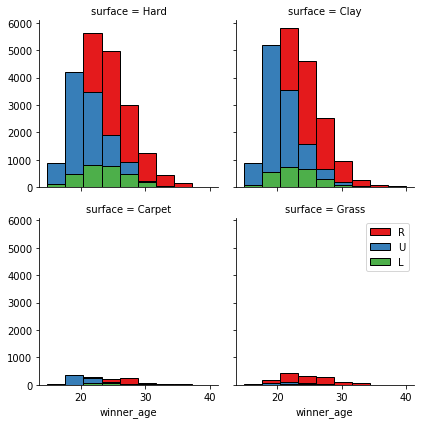

In [40]:
bins = np.linspace(df_wta.winner_age.min(), df_wta.winner_age.max(), 10)
g = sns.FacetGrid(df_wta, col="surface", hue="winner_hand", palette="Set1", col_wrap=2)
g.map(plt.hist, 'winner_age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Changing surface type and hitting hand for number values

In [43]:
df_wta['surface'].replace(to_replace=['Hard','Clay','Carpet','Grass'], value=[0,1,2,3], inplace=True)
df_wta.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_ioc,winner_age,winner_rank,loser_id,loser_name,loser_hand,loser_ioc,loser_age,loser_rank
0,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,201667,Ling Zhang,R,HKG,25.169062,206,203557,Mana Ayukawa,R,JPN,20.290212,473
1,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,206154,Varunya Wongteanchai,U,THA,21.973990,790,204345,Polina Merenkova,U,UZB,19.132101,849
2,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,204288,Ji Hee Choi,R,KOR,19.882272,495,201598,Noppawan Lertcheewakarn,R,THA,23.112936,330
3,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,204291,Na Lae Han,U,KOR,22.480493,313,202638,Chiaki Okadaue,U,JPN,28.167009,421
4,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,214278,Mizuno Kijima,U,JPN,19.104723,692,212026,Kwan Yau Ng,U,HKG,17.856263,1000


In [50]:
df_wta['winner_hand'].replace(to_replace=['R','L','U'], value=[0,1,2], inplace=True)
df_wta.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [51]:
df_wta['tourney_level'].replace(to_replace=['P','I','G','PM','C','S'], value=[1000,2000,3000,4000,5000,6000], inplace=True)
df_wta.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_ioc,winner_age,winner_rank,loser_id,loser_name,loser_hand,loser_ioc,loser_age,loser_rank
0,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,201667,Ling Zhang,0,HKG,25.169062,206,203557,Mana Ayukawa,R,JPN,20.290212,473
1,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,206154,Varunya Wongteanchai,2,THA,21.973990,790,204345,Polina Merenkova,U,UZB,19.132101,849
2,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,204288,Ji Hee Choi,0,KOR,19.882272,495,201598,Noppawan Lertcheewakarn,R,THA,23.112936,330
3,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,204291,Na Lae Han,2,KOR,22.480493,313,202638,Chiaki Okadaue,U,JPN,28.167009,421
4,2015-W-C10-HKG-01A-2015,Hong Kong $10K,0,32,10,20141229,214278,Mizuno Kijima,2,JPN,19.104723,692,212026,Kwan Yau Ng,U,HKG,17.856263,1000


### Define X values for future

In [52]:
Feature = df_wta[['surface','winner_hand','winner_age','winner_rank','tourney_level']]
Feature.head()



,surface,winner_hand,winner_age,winner_rank,tourney_level
0,0,0,25.169062,206,10
1,0,2,21.973990,790,10
2,0,0,19.882272,495,10
3,0,2,22.480493,313,10
4,0,2,19.104723,692,10


In [53]:
X = Feature
X

,surface,winner_hand,winner_age,winner_rank,tourney_level
0,0,0,25.169062,206,10
1,0,2,21.973990,790,10
2,0,0,19.882272,495,10
3,0,2,22.480493,313,10
4,0,2,19.104723,692,10
5,0,0,19.230664,566,10
6,0,0,22.395619,318,10
7,0,0,20.361396,384,10
8,0,2,19.956194,457,10
9,0,2,18.685832,1069,10


In [54]:
y = df_wta['winner_ioc'].values
y[0:5]

array(['HKG', 'THA', 'KOR', 'KOR', 'JPN'], dtype=object)

In [55]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.89358572, -0.82629507,  0.69327075, -0.98798348, -0.39933092],
       [-0.89358572,  1.32011577, -0.17384228,  1.00487907, -0.39933092],
       [-0.89358572, -0.82629507, -0.74151525, -0.00178951, -0.39933092],
       [-0.89358572,  1.32011577, -0.0363822 , -0.62285284, -0.39933092],
       [-0.89358572,  1.32011577, -0.95253505,  0.67046036, -0.39933092]])

## K Nearest Neighbor(KNN)

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (57666, 5) (57666,)
Test set: (14417, 5) (14417,)


In [61]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat = neigh.predict(X_test)
yhat[0:5]

array(['NOR', 'KAZ', 'FRA', 'RUS', 'IND'], dtype=object)

In [62]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9017792113203621
Test set Accuracy:  0.6952902823056114


In [63]:
# Looking for the best

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.80391205, 0.69529028, 0.63112992, 0.56932788, 0.52507456,
       0.48449747, 0.45654436, 0.43192065, 0.40896164])

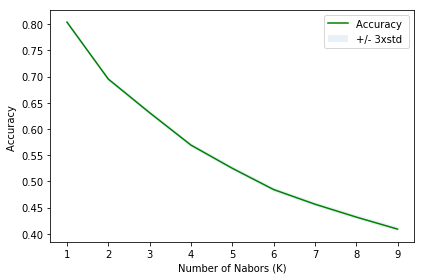

In [60]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### best accuracy is 2

In [64]:
# generating again with best value
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

## Decision TREE

In [69]:
wtaTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
wtaTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
wtaTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
wtaTree = wtaTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['RUS' 'USA' 'USA' 'RUS' 'USA']
['ITA' 'KAZ' 'JPN' 'RUS' 'RUS']


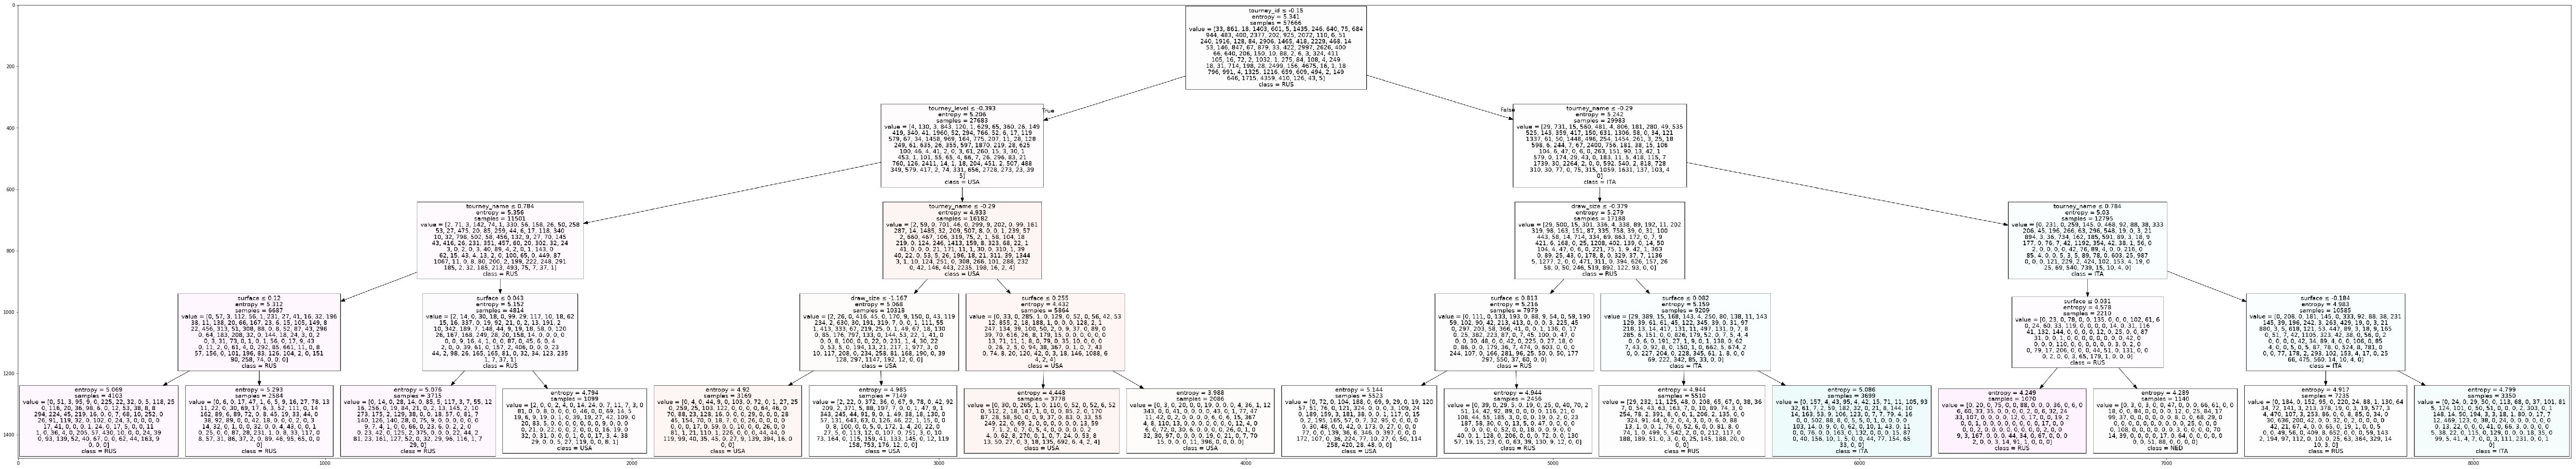

In [73]:
dot_data = StringIO()
filename = "wta.png"
featureNames = df_wta.columns[0:5]
targetNames = df_wta["winner_ioc"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Support Vector Machine

In [74]:
clf = svm.SVC(kernel='rbf',gamma='scale')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
df_svm = df_wta


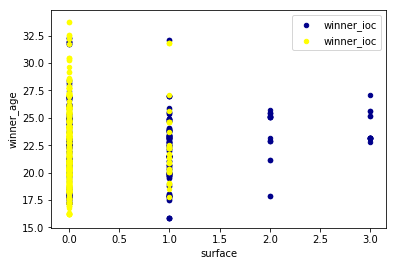

In [77]:
ax = df_svm[df_svm['winner_hand'] == 1][0:500].plot(kind='scatter', x='surface', y='winner_age', color='DarkBlue', label='winner_ioc');
df_svm[df_svm['winner_hand'] == 0][0:500].plot(kind='scatter', x='surface', y='winner_age', color='Yellow', label='winner_ioc', ax=ax);
plt.show()

In [78]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['ROU', 'USA', 'JPN', 'RUS', 'RUS'], dtype=object)

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [83]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=['HKG','THA','KOR','JPN','GBR','CHN','RUS','LIE','TPE','USA','FRA','SUI','CRO','AUS','CZE','LUX','POL','COL','PAR','MEX','TUR','SRB','ITA','EGY','KAZ','BUL','BEL','HUN','BIH','GRE','ESP','NED','SVK','RSA','IND','SWE','ROU','SLO','GER','POR','UKR','OMA','NOR','UZB','KGZ','ISR','CAN','ARG','BOL','BRA','LAT','BLR','IRL','MNE','VEN','EST','MDA','GEO','AUT','MKD','LTU','TUN','PER','CHI','DOM','INA','DEN','ECU','NZL','FIN','SAM','ZIM','PAK','MRI','MAD','MAR','ALG','ARM','GUA','PUR','MAS','PNG','SIN','GRN','rc=','MLT','BAH','TRI','SRI','NGR','SGP'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         ALG       0.00      0.00      0.00         7
         ARG       0.00      0.00      0.00       166
         ARM       0.00      0.00      0.00         6
         AUS       0.25      0.00      0.01       370
         AUT       0.00      0.00      0.00       170
         BEL       0.17      0.04      0.06       351
         BIH       0.00      0.00      0.00        49
         BLR       0.00      0.00      0.00       156
         BOL       0.00      0.00      0.00        16
         BRA       0.67      0.01      0.02       220
         BUL       0.00      0.00      0.00       229
         CAN       0.00      0.00      0.00       126
         CHI       0.00      0.00      0.00        80
         CHN       0.14      0.35      0.20       586
         COL       0.00      0.00      0.00        56
         CRO       0.00      0.00      0.00       255
         CZE       0.13      0.02      0.03       496
         DEN       0.00    

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 9 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


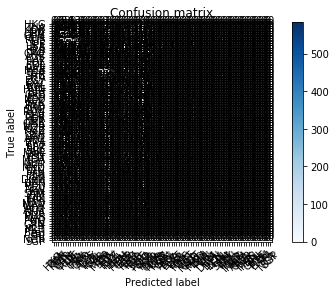

In [84]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HKG','THA','KOR','JPN','GBR','CHN','RUS','LIE','TPE','USA','FRA','SUI','CRO','AUS','CZE','LUX','POL','COL','PAR','MEX','TUR','SRB','ITA','EGY','KAZ','BUL','BEL','HUN','BIH','GRE','ESP','NED','SVK','RSA','IND','SWE','ROU','SLO','GER','POR','UKR','OMA','NOR','UZB','KGZ','ISR','CAN','ARG','BOL','BRA','LAT','BLR','IRL','MNE','VEN','EST','MDA','GEO','AUT','MKD','LTU','TUN','PER','CHI','DOM','INA','DEN','ECU','NZL','FIN','SAM','ZIM','PAK','MRI','MAD','MAR','ALG','ARM','GUA','PUR','MAS','PNG','SIN','GRN','rc=','MLT','BAH','TRI','SRI','NGR','SGP'],normalize= False,  title='Confusion matrix')

## Logistic Regression

In [86]:
yLR = np.asarray(df_wta['winner_ioc'])
yLR [0:5]

array(['HKG', 'THA', 'KOR', 'KOR', 'JPN'], dtype=object)

In [87]:
XLR = Feature
XLR[0:5]

,surface,winner_hand,winner_age,winner_rank,tourney_level
0,0,0,25.169062,206,10
1,0,2,21.973990,790,10
2,0,0,19.882272,495,10
3,0,2,22.480493,313,10
4,0,2,19.104723,692,10


In [88]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
yhat = LR.predict(X_test)
yhat

array(['RUS', 'USA', 'USA', ..., 'USA', 'RUS', 'RUS'], dtype=object)

In [90]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.01, 0.02, 0.01, ..., 0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.01, 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.  , 0.01],
       ...,
       [0.  , 0.01, 0.  , ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])

In [91]:
jaccard_similarity_score(y_test, yhat)

0.10050634667406534

## Conclusion

I think it is safe to say, that a combination of country, age, and raking in wta is the main feature that will drive to understand if a player will obtain more points in WTA

I think after all the diferent analysis, there is still some extra values that will need to be considered to get to an end value, but from the different results, came out that right handed players has more chance on winning matches.